In [ ]:
# Get data
!wget -L https://intersectaustralia.github.io/training/PYTHON203/sources/Data-Adv_Python.zip -O data.zip && unzip data.zip


## Explore Datasets

In [1]:
import pandas as pd

In [2]:
# Explore survey data
survey_df = pd.read_csv("Data/surveys.csv")
survey_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [3]:
survey_df.columns


Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [4]:
survey_df["plot_id"].value_counts()

12    2365
2     2194
17    2039
1     1995
4     1969
9     1936
11    1918
8     1891
14    1885
3     1828
6     1582
13    1538
18    1445
22    1399
20    1390
5     1194
19    1189
21    1173
15    1069
24    1048
7      816
16     646
23     571
10     469
Name: plot_id, dtype: int64

In [5]:
# Find mean by different variables
grouped_df = survey_df.groupby('sex')
grouped_df.mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379


In [6]:
grouped_df[["hindfoot_length", "weight"]].mean()

,hindfoot_length,weight
sex,,
F,28.836780,42.170555
M,29.709578,42.995379


In [7]:
species_df = survey_df.groupby('species_id')

In [8]:
plot_df = survey_df.groupby(['plot_id',"sex"])
plot_df["weight"].mean()

plot_id  sex
1        F      46.311138
         M      55.950560
2        F      52.561845
         M      51.391382
3        F      31.215349
         M      34.163241
4        F      46.818824
         M      48.888119
5        F      40.974806
         M      40.708551
6        F      36.352288
         M      36.867388
7        F      20.006135
         M      21.194719
8        F      45.623011
         M      49.641372
9        F      53.618469
         M      49.519309
10       F      17.094203
         M      19.971223
11       F      43.515075
         M      43.366197
12       F      49.831731
         M      48.909710
13       F      40.524590
         M      40.097754
14       F      47.355491
         M      45.159378
15       F      26.670236
         M      27.523691
16       F      25.810427
         M      23.811321
17       F      48.176201
         M      47.558853
18       F      36.963514
         M      43.546952
19       F      21.978599
         M      20.306878

## Visualisation 

In [9]:
# Explore data viz options
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Load data
gapminder_2016 = pd.read_csv("Data/gapminder_2016.csv")
gapminder_all = pd.read_csv("Data/gapminder_all.csv")
gapminder_2016.head()

,country,continent,lifeExp,gdpPercap,pop
0,Afghanistan,Asia,52.72,1996,35500000
1,Albania,Europe,78.10,11154,2900000
2,Algeria,Africa,76.50,13740,42200000
3,Andorra,Europe,84.80,48185,80000
4,Angola,Africa,60.00,7773,28600000


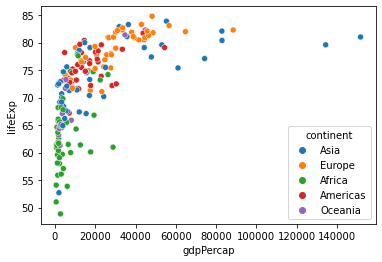

In [11]:
# Introduction to different plots
# Scatter plot
sns.scatterplot(data = gapminder_2016,
               x = "gdpPercap",
               y = "lifeExp",
               hue = "continent");

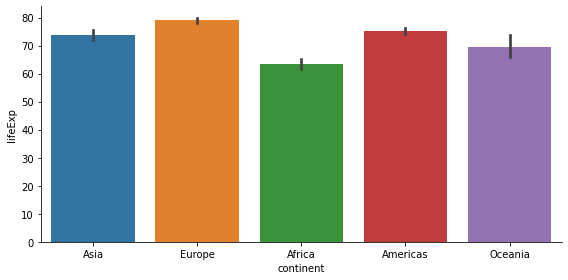

In [12]:
# Bar plot
sns.catplot(data = gapminder_2016,
           x = "continent",
           y = "lifeExp",
           kind = "bar",
           height = 4,
           aspect = 2);

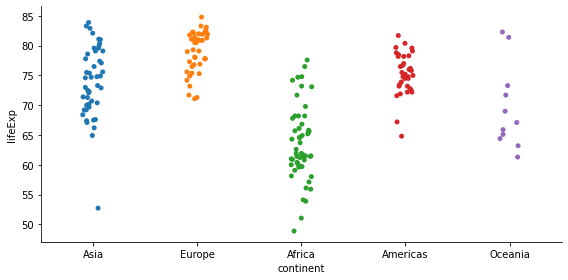

In [13]:
# Strip plot
sns.catplot(data = gapminder_2016,
           x = "continent",
           y = "lifeExp",
           kind = "strip",
           height = 4,
           aspect = 2);

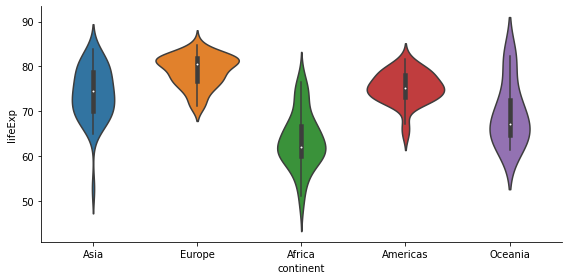

In [14]:
# Violin plot
sns.catplot(data = gapminder_2016,
           x = "continent",
           y = "lifeExp",
           kind = "violin",
           height = 4,
           aspect = 2);

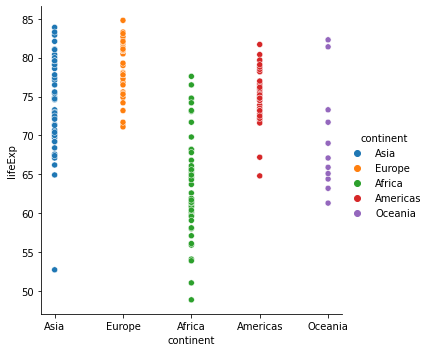

In [15]:
# Relation plot
sns.relplot(data = gapminder_2016,
           x = "continent",
           y = "lifeExp",
           hue = "continent");

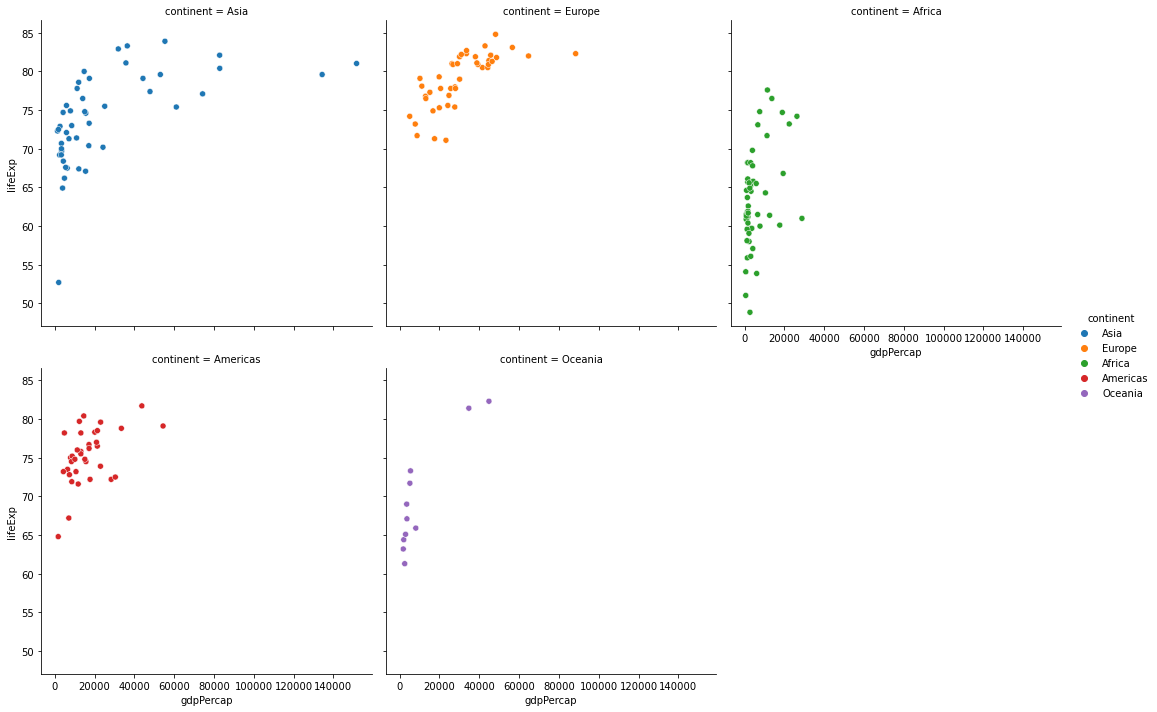

In [17]:
# Customisation options
sns.relplot(data = gapminder_2016,
           x = "gdpPercap",
           y = "lifeExp",
           hue = "continent",
           col = "continent",
           col_wrap=3);

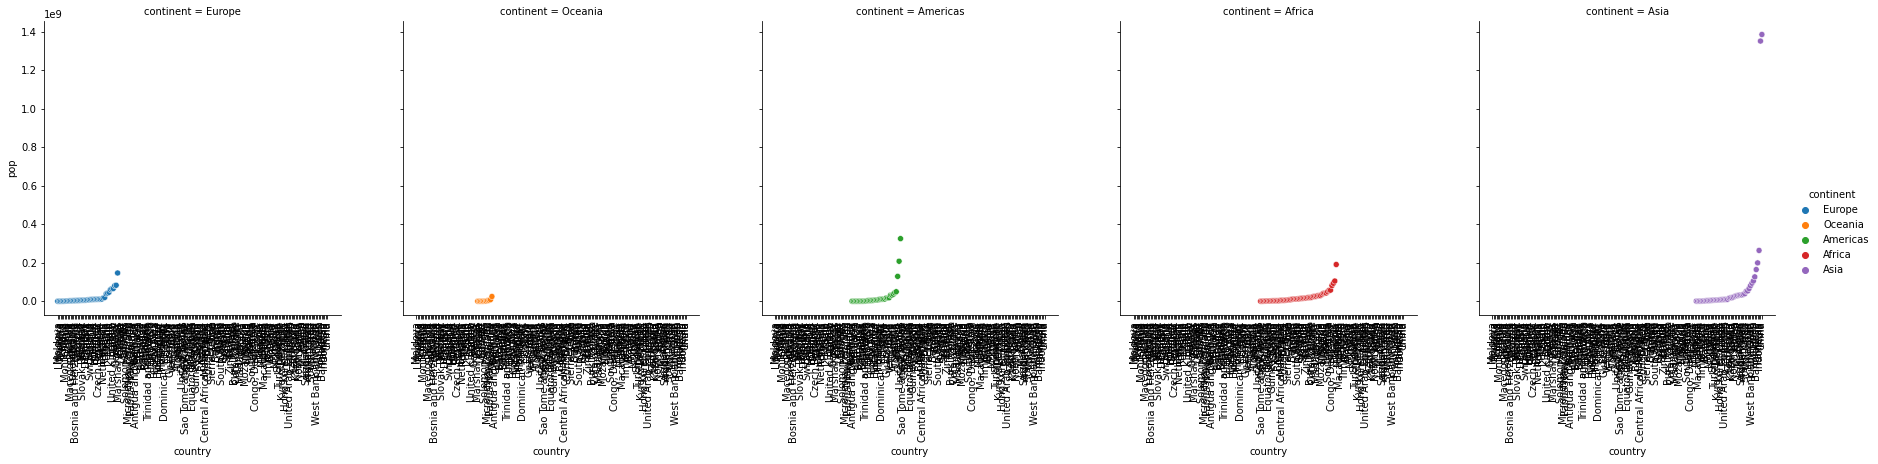

In [18]:
gapminder_sub = gapminder_2016.sort_values("pop")
plot = sns.relplot(
data = gapminder_sub,
x = "country",
y = "pop",
col = "continent",
hue = "continent");

for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90);

## Plot Customisation

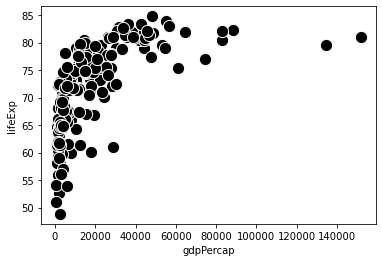

In [20]:
# Back to scatterplot configuration
sns.scatterplot(data = gapminder_2016,
               x = "gdpPercap",
               y = "lifeExp",
               marker = "o",
               s = 150,
               color = "black");

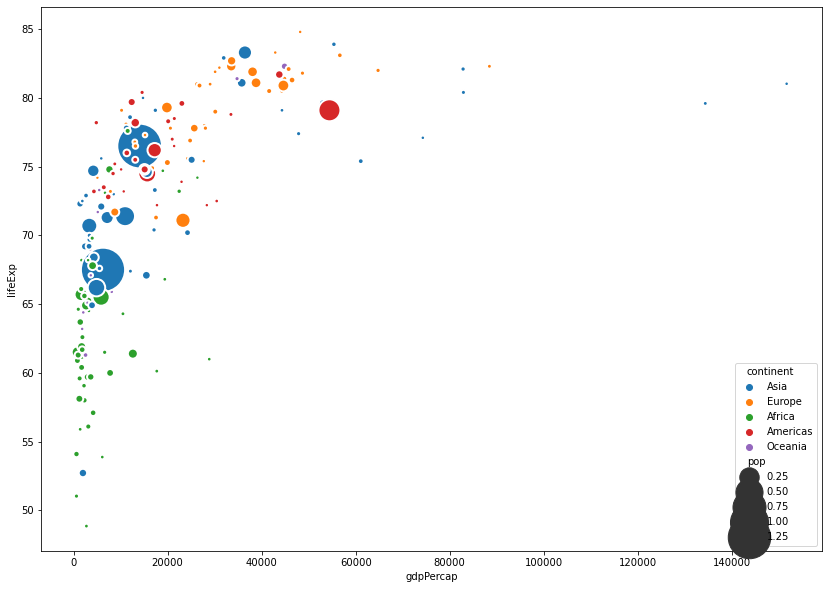

In [21]:
# Add dimensions
plt.figure(figsize = (14,10))
sns.scatterplot(data = gapminder_2016,
               x = "gdpPercap",
               y = "lifeExp",
               hue = "continent",
               size = "pop",
               sizes = (20,2000),
               marker = "o",
               edgecolor = "white",
               linewidth = 2);

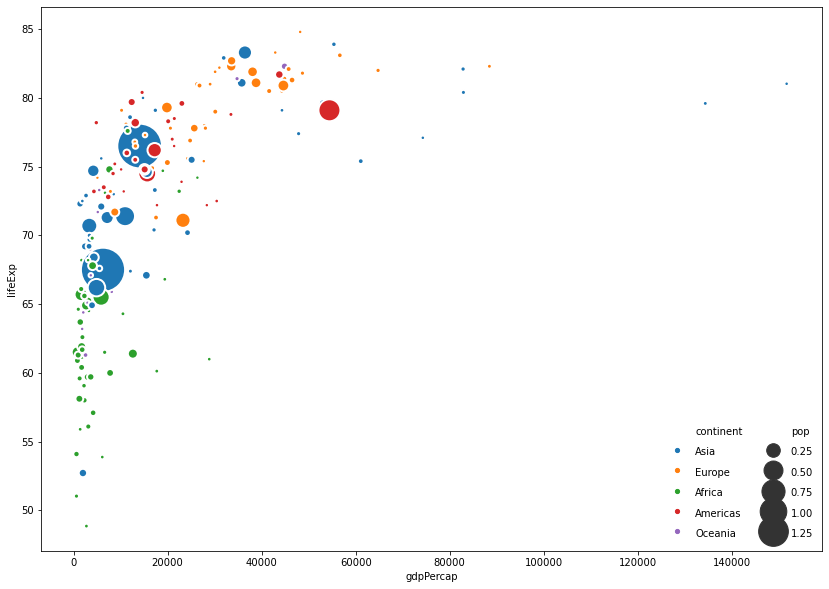

In [22]:
# Change legend
plt.figure(figsize = (14,10))
sns.scatterplot(data = gapminder_2016,
               x = "gdpPercap",
               y = "lifeExp",
               hue = "continent",
               size = "pop",
               sizes = (20,2000),
               marker = "o",
               edgecolor = "white",
               linewidth = 2);

# Legend
lgd = plt.legend(
    loc = "lower right",
    frameon = 0.5,
    framealpha = 0.8,
    edgecolor = "white",
    facecolor = "white",
    ncol = 2,
    handlelength = 2,
    handleheight = 2,
    markerscale = 0.7)


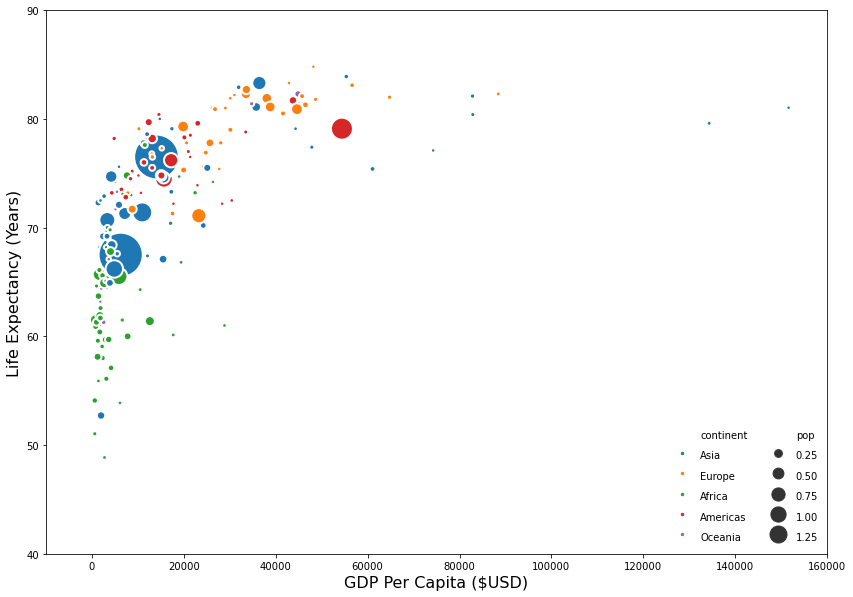

In [23]:
# Change axis and adjust legend scale
plt.figure(figsize = (14,10))
sns.scatterplot(data = gapminder_2016,
               x = "gdpPercap",
               y = "lifeExp",
               hue = "continent",
               size = "pop",
               sizes = (20,2000),
               marker = "o",
               edgecolor = "white",
               linewidth = 2);

lgd = plt.legend(
    loc = "lower right",
    frameon = 0.5,
    framealpha = 0.8,
    edgecolor = "white",
    facecolor = "white",
    ncol = 2,
    handlelength = 2,
    handleheight = 2,
    markerscale = 0.4)

plt.xlim(-10000,160000)
plt.ylim(40,90)
plt.xlabel("GDP Per Capita ($USD)", fontsize = 16)
plt.ylabel("Life Expectancy (Years)", fontsize = 16);

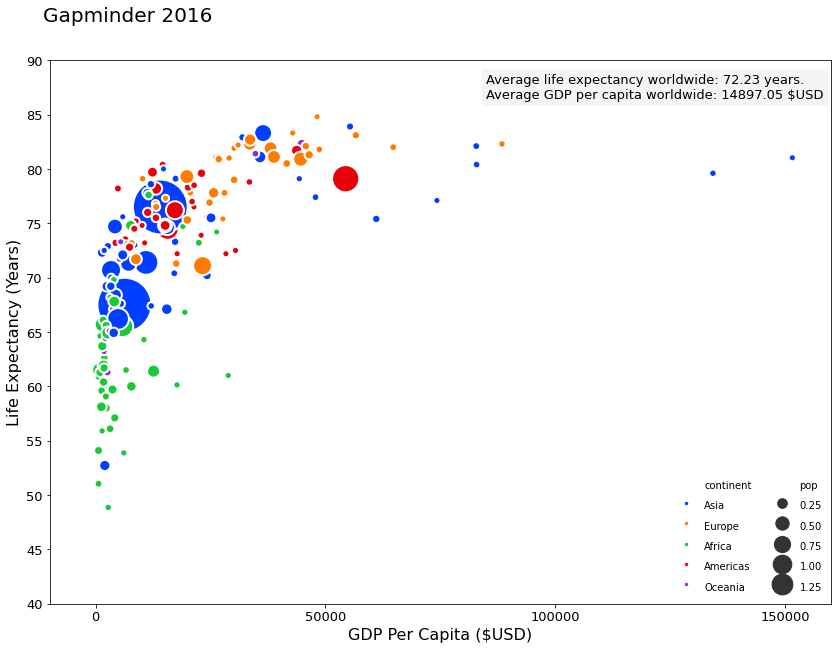

In [27]:
# Change axis ticks and add title
plt.figure(figsize = (14,10))
sns.scatterplot(data = gapminder_2016,
               x = "gdpPercap",
               y = "lifeExp",
               hue = "continent",
               size = "pop",
               sizes = (50,3000),
               marker = "o",
               edgecolor = "white",
               linewidth = 2,
               palette = "bright");

lgd = plt.legend(
    loc = "lower right",
    frameon = 0.5,
    framealpha = 0.8,
    edgecolor = "white",
    facecolor = "white",
    ncol = 2,
    handlelength = 2,
    handleheight = 2,
    markerscale = 0.4)

plt.xlim(-10000,160000)
plt.ylim(40,90)

plt.xlabel("GDP Per Capita ($USD)", fontsize = 16)
plt.ylabel("Life Expectancy (Years)", fontsize = 16)

plt.xticks([0,50000,100000,150000])
plt.yticks(np.arange(40, max(gapminder_2016['lifeExp'])+10, 5))
plt.tick_params(axis="both", labelsize = 13)

plt.title("Gapminder 2016", fontsize = 20, y = 1.06, x =0.1);

# Add textbox of averages       
avg_lifeExp = round(sum(gapminder_2016["lifeExp"] * gapminder_2016["pop"]/sum(gapminder_2016["pop"])),2)
avg_gdp = round(sum(gapminder_2016["gdpPercap"] * gapminder_2016["pop"]/sum(gapminder_2016["pop"])),2)
my_sub = "Average life expectancy worldwide: %s years.\nAverage GDP per capita worldwide: %s $USD" % (avg_lifeExp, avg_gdp);

plt.text(85000,86.5,my_sub, size = 13, backgroundcolor="whitesmoke");

### Explore average life expectancy per continent

In [28]:
global_avg_LE = gapminder_2016["lifeExp"].mean()

gapminder_2016["lifeExp_diff"] = round(gapminder_2016["lifeExp"]-global_avg_LE,2)
gapminder_2016.head()


,country,continent,lifeExp,gdpPercap,pop,lifeExp_diff
0,Afghanistan,Asia,52.72,1996,35500000,-19.40
1,Albania,Europe,78.10,11154,2900000,5.98
2,Algeria,Africa,76.50,13740,42200000,4.38
3,Andorra,Europe,84.80,48185,80000,12.68
4,Angola,Africa,60.00,7773,28600000,-12.12


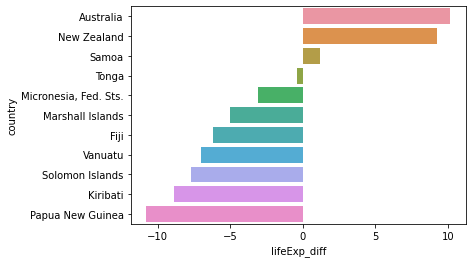

In [31]:
# Plot
sns.barplot(
    data=gapminder_2016[gapminder_2016.continent == "Oceania"].sort_values("lifeExp",ascending=False),
    x="lifeExp_diff",
    y="country",
    #hue="lifeExp_class"
);